In [13]:
import VISSSlib
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
settings = "/projekt1//ag_maahn/VISSS_config/hyytiala_v1.yaml"
case = "20211221-000000"
case = "20220117-070000"
case = "20220225-090000"
case = "20220404-000000"

settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20221106-2000"
settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20221114-151000" #backlight adjusted
settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20230120-180000" #snow removal
#settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20230213-200000" #backlight adjusted

version='2023.1.6'

In [109]:

from importlib import reload
reload(VISSSlib.matching)
reload(VISSSlib.fixes)
reload(VISSSlib.tools)

<module 'VISSSlib.tools' from '/home/mmaahn/projectsSrv/VISSSlib/src/VISSSlib/tools.py'>

In [123]:
config = VISSSlib.tools.readSettings(settings)
fl = VISSSlib.files.FindFiles(case, config.leader, config)
fname1L = fl.listFiles("level1detect")[0]
fname1Match = VISSSlib.files.FilenamesFromLevel(fname1L, config).fname["level1match"]

In [111]:
rotate_default = pd.Series({
    "camera_phi": 0.0, #zero is unstable!
    "camera_theta": 0.0, #zero is unstable!
#     "psi": 0.0, #zero is unstable!
#     "Of_y": 0.0, #zero is unstable!
    "camera_Ofz": 0.0, #zero is unstable!
#     "Ol_x": 0.0, #zero is unstable!
})
# 
rotate_err_default = pd.Series({
    "camera_phi":  5,
    "camera_theta":  5,
#     "psi": .1,
#     "Of_y": 50, 
    "camera_Ofz": 50, 
#     "Ol_x":50, #zero is unstable!
})

In [112]:
rotate_default = pd.Series(config.rotate['20221105-0000']["transformation"])
rotate_err_default = pd.Series(config.rotate['20221105-0000']["transformation_err"])

In [113]:
rotate_default

camera_Ofz      21.000863
camera_phi      -2.936190
camera_theta     3.445897
dtype: float64

## in the first step, use only large particles and do not use Z difference at all!

set minDMax4rot so that matched twice does appear not that often

do not choose a case where more than one particle is seen at the sma etime - filter this data ??

In [114]:
reload(VISSSlib.matching)
reload(VISSSlib.tools)
fout, matchedDat, rot, rot_err = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, 
                                                                  rotate=rotate_default, rotate_err=rotate_err_default, maxDiffMs="config", nPoints=1000, testing=False, chunckSize=10000, minSamples4rot=40,
                  minDMax4rot=10,
                  singleParticleFramesOnly=True,
                  sigma = {
#             "Z" : 1.7, # estimated from OE results
            "H" : 1.2, # estimated from OE results
            "I" : .01,
        })


opening /projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_leader_S1145792_20230120-180000.nc
opening ['/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-175959.nc', '/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-180959.nc']
1 of 1 slice for follower restart 2023-01-20T17:59:59.997551000 2023-01-20T18:10:01.815574000
using 739 of 1000
estimateCaptureIdDiff statistic: {-86898388: 304, -86898387: 207, -86898386: 144, -86898389: 84} capture_time
using 874 of 1000
estimateCaptureIdDiff statistic: {-86898386: 874} record_time
capture_id determined -86898386, 100.0% have the same value
Taking offset from record_time (-86898386, 874) intead of capture_time (-99, -99)
DMax filter leader: 10 45.942292093166984 %
DMax filter

In [115]:
reload(VISSSlib.matching)
fout, matchedDat, rot2, rot_err2 = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, rotate=rot, rotate_err=rot_err, nPoints=500, minSamples4rot=5)
rot2, rot_err2

opening /projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_leader_S1145792_20230120-180000.nc
opening ['/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-175959.nc', '/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-180959.nc']
1 of 1 slice for follower restart 2023-01-20T17:59:59.997551000 2023-01-20T18:10:01.815574000
using 372 of 500
estimateCaptureIdDiff statistic: {-86898388: 152, -86898387: 107, -86898386: 71, -86898389: 42} capture_time
using 437 of 500
estimateCaptureIdDiff statistic: {-86898386: 437} record_time
capture_id determined -86898386, 100.0% have the same value
Taking offset from record_time (-86898386, 437) intead of capture_time (-99, -99)
rotation coefficients iteration 0 of 20
doMatch 3000 3000


(camera_Ofz     -51.697106
 camera_phi       0.921791
 camera_theta     1.038787
 dtype: float64,
 camera_Ofz      0.291537
 camera_phi      0.018465
 camera_theta    0.016740
 dtype: float64)

In [116]:
fout, matchedDat, rot3, rot_err3 = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, rotate=rot2, rotate_err=rot_err2, nPoints=500, minSamples4rot=5)


opening /projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_leader_S1145792_20230120-180000.nc
opening ['/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-175959.nc', '/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-180959.nc']
1 of 1 slice for follower restart 2023-01-20T17:59:59.997551000 2023-01-20T18:10:01.815574000
using 372 of 500
estimateCaptureIdDiff statistic: {-86898388: 152, -86898387: 107, -86898386: 71, -86898389: 42} capture_time
using 437 of 500
estimateCaptureIdDiff statistic: {-86898386: 437} record_time
capture_id determined -86898386, 100.0% have the same value
Taking offset from record_time (-86898386, 437) intead of capture_time (-99, -99)
rotation coefficients iteration 0 of 20
doMatch 3000 3000


In [117]:
print(yaml.dump({"rotate":rot3.round(6).to_dict(), "rotate_err": rot_err3.round(6).to_dict()}))

rotate:
  camera_Ofz: -52.014275
  camera_phi: 0.940994
  camera_theta: 1.039216
rotate_err:
  camera_Ofz: 0.271713
  camera_phi: 0.017485
  camera_theta: 0.017225



In [118]:
print(yaml.dump({"rotate":rot3.round(6).to_dict(), "rotate_err": rot_err3.round(6).to_dict()}))

rotate:
  camera_Ofz: -52.014275
  camera_phi: 0.940994
  camera_theta: 1.039216
rotate_err:
  camera_Ofz: 0.271713
  camera_phi: 0.017485
  camera_theta: 0.017225



In [119]:
fout, matchedDat, rot4, rot_err4 = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, rotate=rot3, rotate_err=rot_err3, nPoints=500, minSamples4rot=5)


opening /projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_leader_S1145792_20230120-180000.nc
opening ['/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-175959.nc', '/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/level1detect/2023/01/20/level1detect_V2023.1.6_sail_visss01_visss_follower_S1143155_20230120-180959.nc']
1 of 1 slice for follower restart 2023-01-20T17:59:59.997551000 2023-01-20T18:10:01.815574000
using 372 of 500
estimateCaptureIdDiff statistic: {-86898388: 152, -86898387: 107, -86898386: 71, -86898389: 42} capture_time
using 437 of 500
estimateCaptureIdDiff statistic: {-86898386: 437} record_time
capture_id determined -86898386, 100.0% have the same value
Taking offset from record_time (-86898386, 437) intead of capture_time (-99, -99)
rotation coefficients iteration 0 of 20
doMatch 3000 3000


In [120]:
print(yaml.dump({"rotate":rot4.round(6).to_dict(), "rotate_err": rot_err4.round(6).to_dict()}))

rotate:
  camera_Ofz: -52.222031
  camera_phi: 0.95371
  camera_theta: 1.038862
rotate_err:
  camera_Ofz: 0.273537
  camera_phi: 0.017716
  camera_theta: 0.017271



In [121]:
print(yaml.dump({"rotate": {case: {"transformation": rot4.round(
    6).to_dict(), "transformation_err": rot_err4.round(6).to_dict()}}#
                }))

rotate:
  20230120-180000:
    transformation:
      camera_Ofz: -52.222031
      camera_phi: 0.95371
      camera_theta: 1.038862
    transformation_err:
      camera_Ofz: 0.273537
      camera_phi: 0.017716
      camera_theta: 0.017271



# check camera positions

In [122]:
fout, matchedDat, rot5, rot_err5 = VISSSlib.matching.matchParticles(fname1L, config, rotate=rot4, rotate_err=rot_err4, minSamples4rot=5)


FileNotFoundError: [Errno 2] No such file or directory: b'/projekt6/ag_maahn/data_obs_nobackup/sail/visss_2023.1.6/metaRotation/2023/01/20/metaRotation_V2023.1.6_sail_visss01_visss_leader_S1145792_20230120.nc'

In [ ]:
(matchedDat.position3D.sel(position3D_elements="z") - matchedDat.position3D.sel(position3D_elements="z_rotated")).plot.hist(bins=np.arange(-10,11,1))

In [18]:
ii = (matchedDat.Dmax.mean("camera")> 20) & (matchedDat.blur.mean("camera")> 500)
ii = (matchedDat.Dmax.mean("camera")> 1) & (matchedDat.blur.mean("camera")> 1)
matchedDat1 = matchedDat.isel(pair_id=ii)

In [19]:
bins = np.linspace(0, config.frame_width, 21)

(0.0, 1280.0)

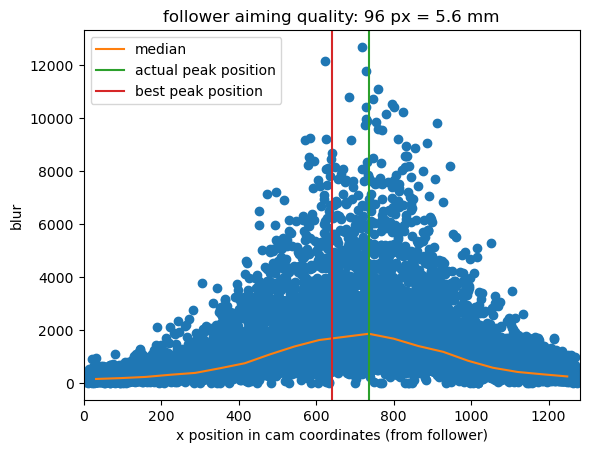

In [20]:
x =(matchedDat1.roi.sel(ROI_elements="x", camera=config.follower) +
                        (matchedDat1.roi.sel(ROI_elements="w", camera=config.follower)/2))

plt.scatter(x, matchedDat1.blur.sel(camera=config.leader))

med = matchedDat1.blur.sel(camera=config.leader).groupby_bins(x, bins=bins).median()

med.plot(color="C1", label="median")

peakPos = med.roi_bins[[med.argmax()]].values[0].mid
plt.axvline(peakPos, color="C2", label="actual peak position")
plt.axvline(config.frame_width//2, color="C3", label="best peak position")

plt.legend()
plt.xlabel("x position in cam coordinates (from follower)")
distance = peakPos-config.frame_width//2
distanceMM = distance*config.resolution/1000
plt.title("follower aiming quality: %i px = %.1f mm"%(distance, distanceMM))

plt.xlim(0,config.frame_width)

(0.0, 1280.0)

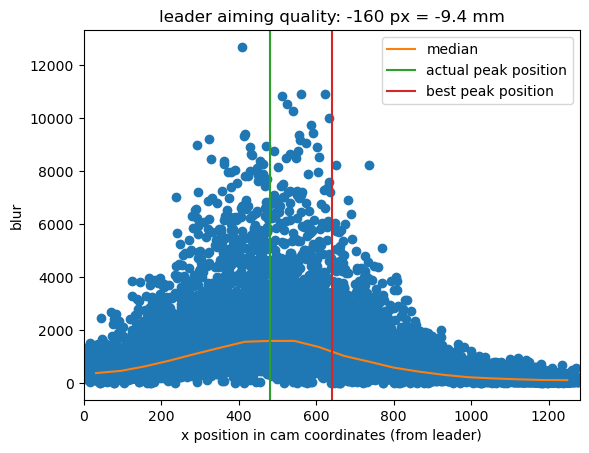

In [21]:
x =(matchedDat1.roi.sel(ROI_elements="x", camera=config.leader) +
                        (matchedDat1.roi.sel(ROI_elements="w", camera=config.leader)/2))

plt.scatter(x, matchedDat1.blur.sel(camera=config.follower))


med = matchedDat1.blur.sel(camera=config.follower).groupby_bins(x, bins=bins).median()

med.plot(color="C1", label="median")

peakPos = med.roi_bins[[med.argmax()]].values[0].mid
plt.axvline(peakPos, color="C2", label="actual peak position")
plt.axvline(config.frame_width//2, color="C3", label="best peak position")

plt.legend()
plt.xlabel("x position in cam coordinates (from leader)")

distance = peakPos-config.frame_width//2
distanceMM = distance*config.resolution/1000
plt.title("leader aiming quality: %i px = %.1f mm"%(distance, distanceMM))

plt.xlim(0,config.frame_width)

In [22]:
med

<xarray.DataArray 'blur' (roi_bins: 20)>
array([ 381.98278809,  464.31918335,  640.58642578,  861.70666504,
       1106.00537109, 1337.71520996, 1564.06689453, 1595.79296875,
       1595.49804688, 1361.32617188, 1030.38232422,  814.18725586,
        588.24475098,  439.29528809,  317.01184082,  225.59664917,
        180.56176758,  146.17489624,  121.21910095,  115.33964539])
Coordinates:
  * roi_bins  (roi_bins) object (0.0, 64.0] (64.0, 128.0] ... (1216.0, 1280.0]
    camera    <U17 'follower_S1143155'

In [23]:
config

{'computers': ['visss', 'visss'],
 'cropImage': None,
 'fps': 140,
 'exposureTime': 0.0002,
 'resolution': 58.75,
 'frame_height': 1024,
 'frame_width': 1280,
 'height_offset': 64,
 'instruments': ['trigger_S1145792', 'follower_S1143155'],
 'instrumentsOrig': ['trigger_S1242799', 'follower_S1242357'],
 'leader': 'trigger_S1145792',
 'follower': 'follower_S1143155',
 'minMovingPixels': [20, 10, 5, 2, 2, 2, 2],
 'movieExtension': 'mov',
 'nThreads': 1,
 'path': '/projekt1/ag_maahn/data_obs/hyytiala/visss/{level}',
 'pathOut': '/projekt4/ag_maahn/data_obs_nobackup/hyytiala/visss/{level}',
 'pathTmp': '/projekt4/ag_maahn/data_obs_nobackup/hyytiala/visss/{level}',
 'pathQuicklooks': '/projekt4/ag_maahn/quicklooks/hyytiala/visss/{level}',
 'threshs': [20, 30, 40, 60, 80, 100, 120],
 'visssGen': 'visss',
 'site': 'hyytiala',
 'goodFiles': ['None', 'None'],
 'start': '2021-09-07',
 'end': '2022-05-17',
 'name': 'Hyytiälä',
 'dataFixes': ['captureIdOverflows', 'makeCaptureTimeEven'],
 'newFileI

# volume

In [24]:
import VISSSlib
import numpy as np

In [25]:
 rot4 = rotate =    {
      "Of_z": -31.124908,
      "phi": 3.285133,
      "theta": 3.317632,
    }

In [26]:
x = np.array([0, config.frame_width,  config.frame_width, 0, 0, config.frame_width,  config.frame_width, 0])
y = np.array([0, 0, config.frame_width, config.frame_width, config.frame_width, config.frame_width, 0, 0])
z = np.array([0, 0, 0, 0, config.frame_height, config.frame_height, config.frame_height, config.frame_height])





In [27]:
x1, y1, z1 = VISSSlib.matching.shiftRotate_F2L(x,y,z, phi = rotate["phi"], theta = rotate["theta"], psi=0, Ol_x=0, Of_y=0, Of_z = rotate["Of_z"])

x2, y2, z2 = VISSSlib.matching.shiftRotate_L2F(x,y,z, phi = rotate["phi"], theta = rotate["theta"], psi=0, Ol_x=0, Of_y=0, Of_z = rotate["Of_z"])

TypeError: shiftRotate_F2L() got an unexpected keyword argument 'Ol_x'

In [ ]:
z1, z2

In [ ]:
rotate

In [ ]:
%matplotlib widget



In [ ]:
import polytope as pc
import numpy as np

A = np.array([[1.0, 0.0],
              [0.0, 1.0],
              [-1.0, -0.0],
              [-0.0, -1.0]])

b = np.array([2.0, 1.0, 0.0, 0.0])

p = pc.Polytope(A, b)

In [ ]:
print(p)

In [ ]:
p = pc.box2poly([[0, 2], [0, 1]])
print(p)

In [ ]:
 pc.box2poly?

In [ ]:
p.volume

In [ ]:
from Geometry3D import *
a = Point(1,1,1)
b = Point(0,1,1)
c = Point(0,0,1)
d = Point(1,0,1)
e = Point(1,1,0)
f = Point(0,1,0)
g = Point(0,0,0)
h = Point(1,0,0)
cpg0 = ConvexPolygon((a,d,h,e))
cpg1 = ConvexPolygon((a,e,f,b))
cpg2 = ConvexPolygon((c,b,f,g))
cpg3 = ConvexPolygon((c,g,h,d))
cpg4 = ConvexPolygon((a,b,c,d))
cpg5 = ConvexPolygon((e,h,g,f))
cph0 = ConvexPolyhedron((cpg0,cpg1,cpg2,cpg3,cpg4,cpg5))
cph0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
Point?

In [ ]:
width = 1280
height = 1024

In [ ]:
config.frame_width

In [ ]:
from Geometry3D import *

# depth is unknown (y) so take 3*w!

a = Point(width,2*width,height)
b = Point(0,2*width,height)
c = Point(0,-width,height)
d = Point(width,-width,height)
e = Point(width,2*width,0)
f = Point(0,2*width,0)
g = Point(0,-width,0)
h = Point(width,-width,0)
cpg0 = ConvexPolygon((a,d,h,e))
cpg1 = ConvexPolygon((a,e,f,b))
cpg2 = ConvexPolygon((c,b,f,g))
cpg3 = ConvexPolygon((c,g,h,d))
cpg4 = ConvexPolygon((a,b,c,d))
cpg5 = ConvexPolygon((e,h,g,f))
leader = ConvexPolyhedron((cpg0,cpg1,cpg2,cpg3,cpg4,cpg5))

r = Renderer()
r.add((leader,'r',1))
r.show()


leader.volume()


In [ ]:
from Geometry3D import *
from VISSSlib import matching
r = Renderer()


a = Point(width,2*width,height)
b = Point(0,2*width,height)
c = Point(0,-width,height)
d = Point(width,-width,height)
e = Point(width,2*width,0)
f = Point(0,2*width,0)
g = Point(0,-width,0)
h = Point(width,-width,0)
cpg0 = ConvexPolygon((a,d,h,e))
cpg1 = ConvexPolygon((a,e,f,b))
cpg2 = ConvexPolygon((c,b,f,g))
cpg3 = ConvexPolygon((c,g,h,d))
cpg4 = ConvexPolygon((a,b,c,d))
cpg5 = ConvexPolygon((e,h,g,f))
leader = ConvexPolyhedron((cpg0,cpg1,cpg2,cpg3,cpg4,cpg5))

r.add((leader,'r',1))

#strange result
phi = 1
theta =1
Of_z = 1

#ValueError: Check for the number of vertices, faces and edges fails, the polyhedron may not be closed
phi = 3
theta =3
Of_z = 10

# works
phi = 0
theta =0
Of_z = 10

# works
phi = 90
theta =0
Of_z = 0

# ValueError: Expected 1 values, got 0
phi = 1
theta =1
Of_z = 0


# depth is unknown (x) so take 3*w!

a = Point(*shiftRotate_F2L(2*width,width,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
b = Point(*shiftRotate_F2L(-width,width,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
c = Point(*shiftRotate_F2L(-width,0,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
d = Point(*shiftRotate_F2L(2*width,0,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
e = Point(*shiftRotate_F2L(2*width,width,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
f = Point(*shiftRotate_F2L(-width,width,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
g = Point(*shiftRotate_F2L(-width,0,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
h = Point(*shiftRotate_F2L(2*width,0,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z))
cpg0 = ConvexPolygon((a,d,h,e))
cpg1 = ConvexPolygon((a,e,f,b))
cpg2 = ConvexPolygon((c,b,f,g))
cpg3 = ConvexPolygon((c,g,h,d))
cpg4 = ConvexPolygon((a,b,c,d))
cpg5 = ConvexPolygon((e,h,g,f))
follower = ConvexPolyhedron((cpg0,cpg1,cpg2,cpg3,cpg4,cpg5))

r.add((follower,'b',1))

obsVolume = intersection(leader,follower)
r.add((obsVolume,'k',1))

r.show()


follower.volume()
obsVolume.volume()

In [ ]:
from Geometry3D import *
from VISSSlib.matching import shiftRotate_F2L


In [ ]:

#!/usr/bin/env python

import numpy as np
import trimesh


scene = trimesh.Scene()

# plane
plane = trimesh.creation.box(extents=[1, 1, 0.01])
plane.visual.face_colors = [0.5, 0.5, 0.5, 0.5]
scene.add_geometry(plane)
scene.add_geometry(trimesh.creation.axis())

# object-1 (box)
box = trimesh.creation.box(extents=[0.3, 0.3, 0.3])
box.visual.face_colors = [0, 1., 0, 0.5]
axis = trimesh.creation.axis(origin_color=[1., 0, 0])
translation = [-0.2, 0, 0.15 + 0.01]  # box offset + plane offset
box.apply_translation(translation)
axis.apply_translation(translation)
rotation = trimesh.transformations.rotation_matrix(
    np.deg2rad(30), [0, 0, 1], point=box.centroid
)
box.apply_transform(rotation)
axis.apply_transform(rotation)
scene.add_geometry(box)
scene.add_geometry(axis)

# object-2 (cylinder)
cylinder = trimesh.creation.cylinder(radius=0.1, height=0.3)
cylinder.visual.face_colors = [0, 0, 1., 0.5]
axis = trimesh.creation.axis(origin_color=[1., 0, 0])
translation = [0.1, -0.2, 0.15 + 0.01]  # cylinder offset + plane offset
cylinder.apply_translation(translation)
axis.apply_translation(translation)
scene.add_geometry(cylinder)
scene.add_geometry(axis)

scene.show()

In [ ]:
r = Renderer()
set_eps( 1e-5 )

a = Point(width,2*width,height)
b = Point(0,2*width,height)
c = Point(0,-width,height)
d = Point(width,-width,height)
e = Point(width,2*width,0)
f = Point(0,2*width,0)
g = Point(0,-width,0)
h = Point(width,-width,0)
cpg0 = ConvexPolygon((a,d,h,e))
cpg1 = ConvexPolygon((a,e,f,b))
cpg2 = ConvexPolygon((c,b,f,g))
cpg3 = ConvexPolygon((c,g,h,d))
cpg4 = ConvexPolygon((a,b,c,d))
cpg5 = ConvexPolygon((e,h,g,f))
leader = ConvexPolyhedron((cpg0,cpg1,cpg2,cpg3,cpg4,cpg5))

r.add((leader,'r',1))

#strange result
phi = 1
theta =1
Of_z = 1

#ValueError: Check for the number of vertices, faces and edges fails, the polyhedron may not be closed
phi = 3
theta =3
Of_z = 10

# works
phi = 0
theta =0
Of_z = 10

# works
phi = 90
theta =0
Of_z = 0

# ValueError: Expected 1 values, got 0
phi = 1
theta =1
Of_z = 0


# depth is unknown (x) so take 3*w!

a = Point(*np.around(shiftRotate_F2L(2*width,width,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),0))
b = Point(*np.around(shiftRotate_F2L(-width,width,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),0))
c = Point(*np.around(shiftRotate_F2L(-width,0,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),0))
d = Point(*np.around(shiftRotate_F2L(2*width,0,height, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),0))
e = Point(*np.around(shiftRotate_F2L(2*width,width,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),0))
f = Point(*np.around(shiftRotate_F2L(-width,width,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),0))
g = Point(*np.around(shiftRotate_F2L(-width,0,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),2))
h = Point(*np.around(shiftRotate_F2L(2*width,0,0, phi=phi, theta=theta, psi=0, Ol_x=0, Of_y=0, Of_z=Of_z),2))
cpg0a = ConvexPolygon((a,h,e))
cpg0b = ConvexPolygon((a,d,h))
cpg1a = ConvexPolygon((a,e,b))
cpg1b = ConvexPolygon((e,f,b))
cpg2a = ConvexPolygon((c,b,g))
cpg2b = ConvexPolygon((b,f,g))
cpg3a = ConvexPolygon((c,h,d))
cpg3b = ConvexPolygon((c,g,h))
cpg4a = ConvexPolygon((a,b,d))
cpg4b = ConvexPolygon((a,b,d))
cpg5a = ConvexPolygon((h,g,f))
cpg5b = ConvexPolygon((e,h,f))
follower = ConvexPolyhedron((cpg0a, cpg0b ,cpg1a, cpg1b ,cpg2a, cpg2b ,cpg3a, cpg3b ,cpg4a, cpg4b ,cpg5a, cpg5b ))

r.add((follower,'b',1))

obsVolume = intersection(leader,follower)
r.add((obsVolume,'k',1))

r.show()


follower.volume()
obsVolume.volume()

In [ ]:
from Geometry3D import *
import copy
radius=5
s1 = Cylinder(Point(-2 * radius,0,0),radius,4*radius * x_unit_vector(),n=40)
s2 = Cylinder(Point(0,-2 * radius,0),radius,4*radius * y_unit_vector(),n=40)
s3 = intersection(s1,s2)
r = Renderer()
r.add((s1,'r',1))
r.add((s2,'b',1))
r.add((s3,'y',5))
r.show()
r2 = Renderer()
r2.add((s3,'y',1))
r2.show()
import math
v_real = 16 / 3 * math.pow(radius,3)
a_real = 16 * math.pow(radius,2)
print('Ground truth volume of the Steinmetz solid is:{}, Calculated value is {}'.format(v_real,s3.volume()))
print('Ground truth surface area of the Steinmetz solid is:{}, Calculated value is {}'.format(a_real,s3.area()))


In [ ]:
from VISSSlib.matching import *
nSample = 10
seed = 0

In [ ]:
        np.random.seed(seed)
        F_x = np.random.random(nSample) * 100
        F_y = np.random.random(nSample) * 100
        F_z = np.random.random(nSample) * 100
        phi = 0#np.random.random(nSample)
        theta = 0#np.random.random(nSample)
        psi = 0#np.random.random(nSample)
        Ol_x = np.random.random(nSample)* 100
        Of_y = np.random.random(nSample)* 100
        Of_z = np.random.random(nSample)* 100

        L_x, L_y, L_z = shiftRotate_F2L(F_x, F_y, F_z, phi, theta, psi, Ol_x, Of_y, Of_z)
        L_z_test = calc_L_z_withOffsets(L_x, F_y, F_z, phi=phi, theta=theta, psi=psi, Of_y=Of_y, Of_z=Of_z, Ol_x=Ol_x)

        assert np.allclose(L_z_test, L_z)

In [ ]:
L_z_test

In [ ]:
        np.random.seed(seed)
        Ol_x = 0#np.random.random(nSample)* 100
        Of_y = 0#np.random.random(nSample)* 100
        Of_z = 0#np.random.random(nSample)* 100
        F_xs = np.random.random(nSample) * 100
        F_ys = np.random.random(nSample) * 100
        F_zs = np.random.random(nSample) * 100
        phi = np.random.random(nSample)
        theta = np.random.random(nSample)
        psi = np.random.random(nSample)
        L_x, L_y, L_z = shiftRotate_F2L(F_xs, F_ys, F_zs, phi, theta, psi,Ol_x, Of_y, Of_z)

        L_z_test = calc_L_z_withOffsets(L_x, F_y, F_z, phi, theta, psi, Of_y, Of_z, Ol_x)

        assert np.allclose(L_z_test, L_z)

In [ ]:
rotate_L2F(L_x, L_y, L_z, phi, theta, psi)

In [ ]:
np.rad2deg(np.arctan2(13,300))

In [ ]:
from solid import *
#from solid.utils import *  # Not required, but the utils module is useful


In [ ]:
d = difference()(
    cube(10),  # Note the comma between each element!
    sphere(15)
)

In [ ]:
d

##### trimesh

In [ ]:
import trimesh
import numpy as np

width = 1280
height = 1024

In [ ]:
phi, theta, psi = 0.123, -1.234, 2.345
origin, xaxis, yaxis, zaxis = [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]
Rx =  trimesh.transformations.rotation_matrix(phi, xaxis)
Ry =  trimesh.transformations.rotation_matrix(theta, yaxis)
Rz =  trimesh.transformations.rotation_matrix(psi, zaxis)
R =  trimesh.transformations.concatenate_matrices(Rx, Ry, Rz)
euler =  trimesh.transformations.euler_from_matrix(R, 'rxyz')
np.allclose([phi, theta, psi], euler)

Re = trimesh.transformations.euler_matrix(phi, theta, psi, 'rxyz')
trimesh.transformations.is_same_transform(R, Re)

In [ ]:
import trimesh
import numpy as np
def rotate_L2F(L_x, L_y, L_z, phi, theta, psi):

    # rotate from leader to follower coordinate system
    phi = np.deg2rad(phi)
    theta = np.deg2rad(theta)
    psi = np.deg2rad(psi)
    
    F_xp =  np.cos(theta) * np.cos(psi) * L_x \
         +  np.cos(theta) * np.sin(psi) * L_y \
         -  np.sin(theta) * L_z
    F_yp = (np.sin(phi) * np.sin(theta) * np.cos(psi) - np.cos(phi) * np.sin(psi)) * L_x \
         + (np.sin(phi) * np.sin(theta) * np.sin(psi) + np.cos(phi) * np.cos(psi)) * L_y \
         +  np.sin(phi) * np.cos(theta) * L_z 
    F_zp = (np.cos(phi) * np.sin(theta) * np.cos(psi) + np.sin(phi) * np.sin(psi)) * L_x \
         + (np.cos(phi) * np.sin(theta) * np.sin(psi) - np.sin(phi) * np.cos(psi)) * L_y \
         +  np.cos(phi) * np.cos(theta) * L_z

    return F_xp, F_yp, F_zp

def shiftRotate_L2F(L_x, L_y, L_z, phi, theta, psi, Ol_x, Of_y, Of_z):

    # shift and rotate from follower to leader coordinate system


    L_xp = L_x + Ol_x

    F_x, F_yp, F_zp = rotate_L2F(L_xp, L_y, L_z, phi, theta, psi)

    F_y = F_yp - Of_y
    F_z = F_zp - Of_z

    return F_x, F_y, F_z



def rotate_F2L(F_xp, F_yp, F_zp, phi, theta, psi):

    # rotate from follower to leader coordinate system
    phi = np.deg2rad(phi)
    theta = np.deg2rad(theta)
    psi = np.deg2rad(psi)

    L_x =  np.cos(theta) * np.cos(psi) * F_xp \
        + (np.sin(phi) * np.sin(theta) * np.cos(psi) - np.cos(phi) * np.sin(psi)) * F_yp \
        + (np.cos(phi) * np.sin(theta) * np.cos(psi) + np.sin(phi) * np.sin(psi)) * F_zp
    L_y =  np.cos(theta) * np.sin(psi) * F_xp \
        + (np.sin(phi) * np.sin(theta) * np.sin(psi) + np.cos(phi) * np.cos(psi)) * F_yp \
        + (np.cos(phi) * np.sin(theta) * np.sin(psi) - np.sin(phi) * np.cos(psi)) * F_zp
    L_z = -np.sin(theta) * F_xp \
        +  np.sin(phi) * np.cos(theta) * F_yp \
        +  np.cos(phi) * np.cos(theta) * F_zp

    return L_x, L_y, L_z

def shiftRotate_F2L(F_x, F_y, F_z, phi, theta, psi, Ol_x, Of_y, Of_z):

    # shift and rotate from follower to leader coordinate system

    F_yp = F_y + Of_y
    F_zp = F_z + Of_z

    L_xp, L_y, L_z = rotate_F2L(F_x, F_yp, F_zp, phi, theta, psi)

    L_x = L_xp - Ol_x

    return L_x, L_y, L_z


width = 1.280
height = 1.024
leader = trimesh.creation.box(extents=(width, 3*width, height))
leader = trimesh.creation.box(extents=(width, width, height))
leader.apply_translation(np.array((width*0.5, width*0.5, height*0.5)))
leader.vertices

follower = trimesh.creation.box(extents=(3*width, width, height))
follower = trimesh.creation.box(extents=(width, width, height))
follower.apply_translation(np.array((width*0.5, width*0.5, height*0.5)))


phi, theta, psi = (25.265006, 55.482963, 31.266505)
phi, theta, psi = (0,10,0)

print(follower.vertices[2])

pnt = follower.vertices[2]
print(shiftRotate_L2F(*pnt,phi=-phi, theta=theta, psi=psi, Ol_x=0, Of_y=0, Of_z=0))
print(shiftRotate_F2L(*pnt,phi=-phi, theta=theta, psi=psi, Ol_x=0, Of_y=0, Of_z=0))

rotation = trimesh.transformations.euler_matrix(np.deg2rad(phi), np.deg2rad(theta), np.deg2rad(psi), "sxyz")


follower.apply_transform(rotation)
print(follower.vertices[2])


merged = leader.intersection(follower)

merged


leader.visual.face_colors = [0.5, 0.5, 0.5, 0.5]
follower.visual.face_colors = [0, 0, 1., 0.5]
merged.visual.face_colors = [1., 0, 0, 0.5]

scene = trimesh.Scene()
scene.add_geometry(trimesh.creation.axis(axis_length=2))

scene.add_geometry(leader)
scene.add_geometry(follower)
scene.add_geometry(merged)
scene.show(viewer="notebook")

#red is x
#green is y
#blue is z

In [ ]:

phi, theta, psi = (25.265006, 55.482963, 31.266505)
Ol_x, Ol_y, Ol_z = (0,0,0)

width = 1.280
height = 1.024
leader = trimesh.creation.box(extents=(width, 3*width, height))
leader.apply_translation(np.array((width*0.5, width*0.5, height*0.5)))
leader.vertices

follower = trimesh.creation.box(extents=(3*width, width, height))
follower.apply_translation(np.array((width*0.5, width*0.5, height*0.5)))

pnt = follower.vertices[2]

print(pnt)

print(shiftRotate_L2F(*pnt,phi=phi, theta=theta, psi=psi, Ol_x=Ol_x, Of_y=Of_y, Of_z=Of_z))
print(shiftRotate_F2L(*pnt,phi=phi, theta=theta, psi=psi, Ol_x=Ol_x, Of_y=Of_y, Of_z=Of_z))

rotation = trimesh.transformations.euler_matrix(np.deg2rad(phi), np.deg2rad(theta), np.deg2rad(psi), "rzyx")


follower.apply_transform(rotation)
print(follower.vertices[2])


merged = leader.intersection(follower)

print(merged.volume)

leader.visual.face_colors = [0.5, 0.5, 0.5, 0.5]
follower.visual.face_colors = [0, 0, 1., 0.5]
merged.visual.face_colors = [1., 0, 0, 0.5]

scene = trimesh.Scene()
scene.add_geometry(trimesh.creation.axis(axis_length=2))

scene.add_geometry(leader)
scene.add_geometry(follower)
scene.add_geometry(merged)
scene.show(viewer="notebook")

#red is x
#green is y
#blue is z

In [ ]:
rotation